## 선행 작업
1. LJ Speech Dataset 다운로드
https://keithito.com/LJ-Speech-Dataset/
    
2. librosa 설치
https://librosa.github.io

In [10]:
import numpy as np

# librosa 라이브러리, wav, mp3등 오디오 파일을 numpy array로 불러오는데 필요. 내장 디코더는 없고, ffmpeg backend를 사용함.
import librosa

# librosa에서 spectrogram 등을 보여주는데 사용되는 모듈
import librosa.display

# librosa display는 matplotlib를 이용하는데 이를 같이 import해서 보여주는데 있어 세부적인 사항들을 조정할 수 있음.
import matplotlib.pyplot as plt


## wav 파일 목록 얻기

In [11]:
import os
from os import listdir
from os.path import isfile, join

data_dir = '/home/scpark/hard/datasets/LJSpeech-1.1/wavs'

# 해당 디렉토리에 있는 파일 중 이름에 wav가 들어가 있는 모든 파일의 경로를 리스트에 담는다.
data_files = [join(data_dir, f) for f in listdir(data_dir) if isfile(join(data_dir, f)) if 'wav' in f]
data_files.sort()

print('wave files : ', len(data_files))
print(data_files[0])


wave files :  13100
/home/scpark/hard/datasets/LJSpeech-1.1/wavs/LJ001-0001.wav


## 파일 로드

wav : [-0.00027466  0.          0.         ... -0.00088501 -0.00097656
 -0.00109863]
sample rate : 22050 length : 41885
duration : 1.899546485260771 seconds


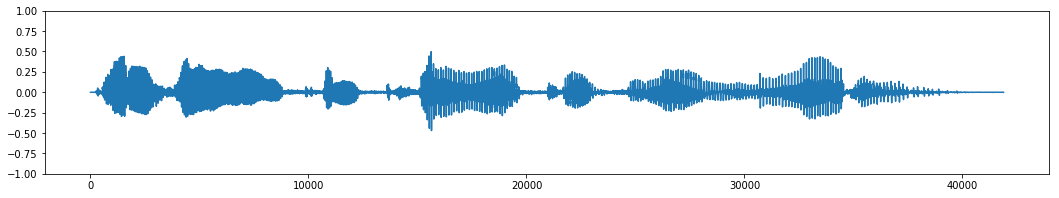

In [12]:
'''
오디오 파일 로드
https://librosa.github.io/librosa/generated/librosa.core.load.html
'''
# return values
# wav : 오디오 신호
# sr : sample rate, default=22050
wav, sr = librosa.core.load(data_files[1])
print('wav :', wav)

# sample rate, 총 샘플 길이
print('sample rate :', sr, 'length :', len(wav))

# 총 시간 = length of wave / sample rate
print('duration :', len(wav) / sr, 'seconds')

# matplotlib를 이용해서 파형 보여주기 
plt.figure(figsize=[18, 3])
plt.plot(wav)
plt.ylim([-1, 1])
plt.show()

# wav 들어보기
import IPython.display as ipd
ipd.Audio(wav, rate=sr)


### 연습1 : 오디오 파일을 sample rate 44100으로 읽어 파형을 보여주고, sample rate 22050으로 들어봅시다.

In [13]:
# sample rate 44100으로 읽어오기

# 파형 보여주기

# sample rate 22050으로 재생하기


## 파형 자세히 보기

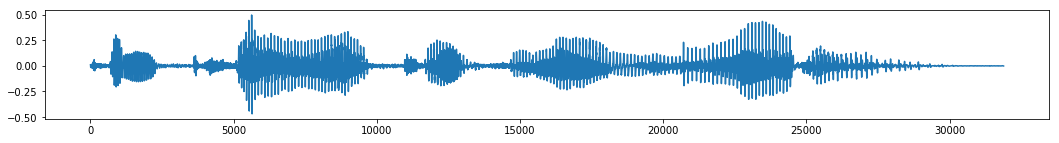

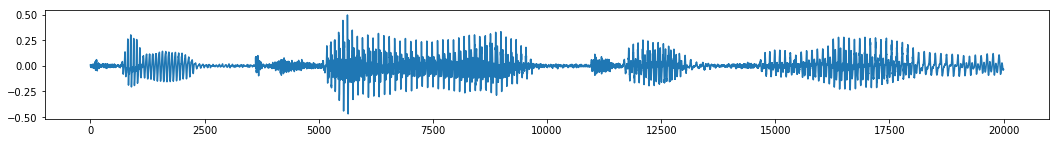

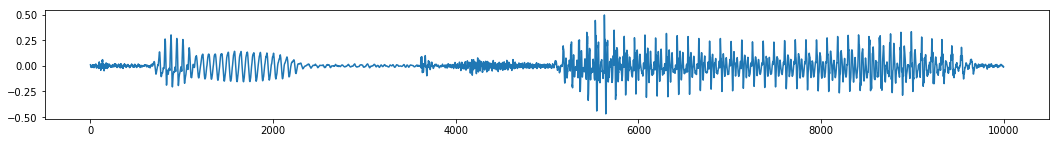

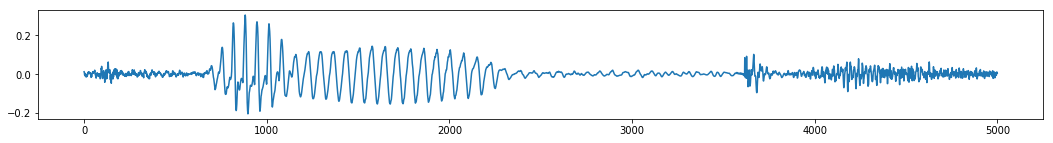

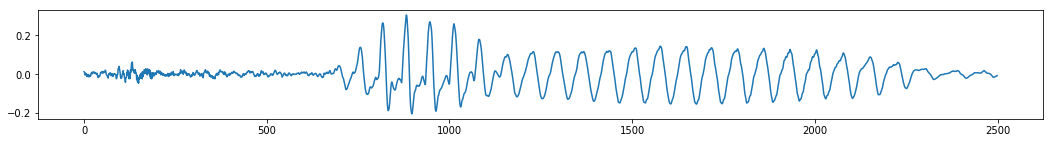

In [14]:
# wav 파형 10000-50000 샘플 보기
plt.figure(figsize=[18, 2])
plt.plot(wav[10000:50000])
plt.show()

# wav 파형 10000-30000 샘플 보기
plt.figure(figsize=[18, 2])
plt.plot(wav[10000:30000])
plt.show()

# wav 파형 10000-20000 샘플 보기
plt.figure(figsize=[18, 2])
plt.plot(wav[10000:20000])
plt.show()

# wav 파형 10000-15000 샘플 보기
plt.figure(figsize=[18, 2])
plt.plot(wav[10000:15000])
plt.show()

# wav 파형 10000-12500 샘플 보기
plt.figure(figsize=[18, 2])
plt.plot(wav[10000:12500])
plt.show()


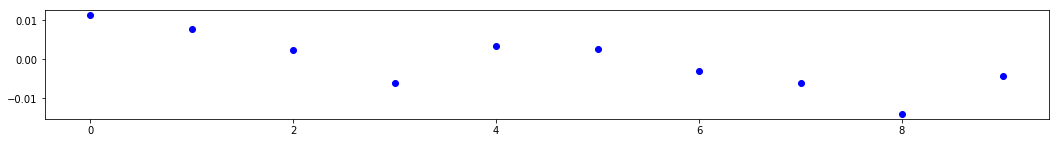

In [15]:
# wav 파형 10000-12500 샘플 보기
plt.figure(figsize=[18, 2])
plt.plot(wav[10000:10010], 'bo')
plt.show()


## Normalization
#### 소리가 작게 녹음 되었거나 데이터들 간에 음량이 제각각인 경우 normalization을 하여 amplitude를 [-1, 1] 범위에 골고루 오도록 맞춰 줍니다. 여기서는 가장 간단한 방법인 데이터의 최대값으로 나눠주는 방법을 사용합니다.

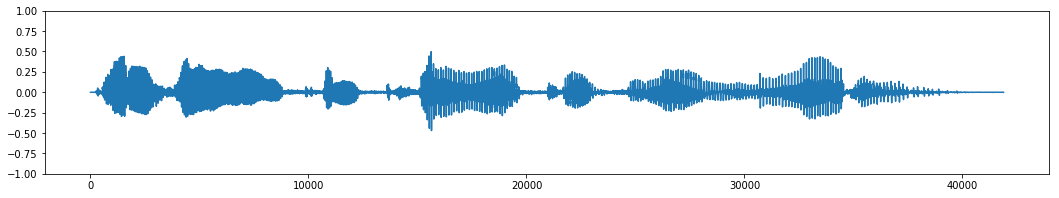

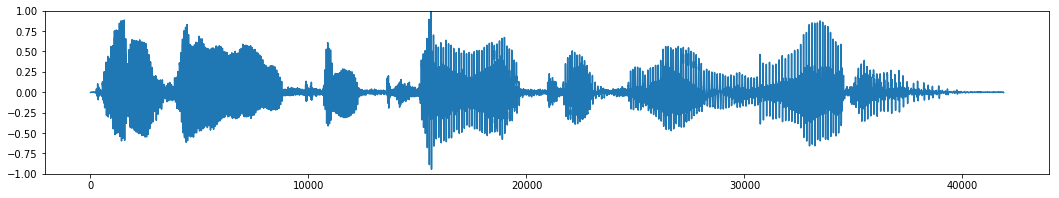

In [16]:
normed_wav = wav / max(np.abs(wav))

plt.figure(figsize=[18, 3])
plt.plot(wav)
plt.ylim([-1, 1])
plt.show()

plt.figure(figsize=[18, 3])
plt.plot(normed_wav)
plt.ylim([-1, 1])
plt.show()


### 연습2 : 파형을 2배, 3배로 키우고 들어 봅시다. 또, 0.5 0.25배로 줄이고 들어 봅시다.

In [17]:
# 파형을 2배로 키우기

# 파형을 3배로 키우기

# 들어보기

# 파형을 0.5배로 줄이기

# 파형을 0.25배로 줄이기

# 들어보기


##  8-bit Quantization


quantized values : [-29 -22 -21 -22 -34 -32 -32 -21 -11 -24 -23   7  15  23  20 -11  17  44
  49  60  60  62  73  63  36  35  41  47  61  48  29  16   1 -10  -6 -14
 -25 -21 -23 -26 -34 -50 -57 -47 -43 -43 -38 -36 -22 -10 -18 -19 -13  -8
  11  20  20  29  32  33  31  23  19  26  27  25  18   7  -1  -5 -12 -20
 -24 -26 -27 -28 -33 -42 -44 -46 -43 -40 -41 -43 -39 -47 -39 -40 -28 -28
   8  36  13  38 -14  -6  45  55  88  96]


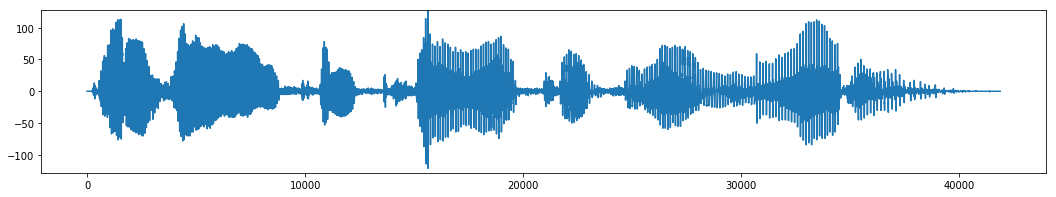

In [18]:
Bit = 8
max_value = 2 ** (Bit-1) # 128

# max_value를 곱함
quantized_8_wav = normed_wav * max_value
# integer로 반올림
quantized_8_wav = np.round(quantized_8_wav).astype(int)
# 범위 설정
quantized_8_wav = np.clip(quantized_8_wav, -max_value, max_value-1)

# quantized된 값들 보기
print('quantized values :', quantized_8_wav[1000:1100])

# quantized된 파형 보기
plt.figure(figsize=[18, 3])
plt.plot(quantized_8_wav)
plt.ylim([-max_value, max_value])
plt.show()

# wav 들어보기
import IPython.display as ipd
ipd.Audio(quantized_8_wav, rate=sr)


### 연습3 : 16-bit quantization을 해보고, 소리를 들어봅시다.


In [19]:
# normed_wav를 16-bit quantize해서 quantized_wav구하기

# quantized_wav 보여주기

# quantized_wav 들어보기


## mu-law encoding
#### 사람의 귀는 소리의 amplitude에 대해 log적으로 반응합니다. 즉, 작은소리의 차이는 잘잡아내는데 반해 소리가 커질수록 그 차이를 잘 느끼지 못합니다. 이러한 특성을 wave값을 표현하는데 반영해서 작은값에는 높은 분별력(high resolution)을, 큰값끼리는 낮은 분별력(low resolution)을 갖도록 합니다.


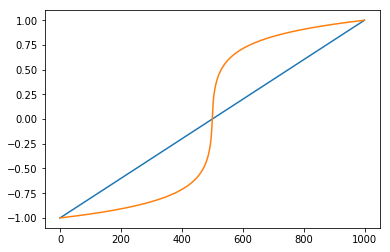

In [20]:
def mu_law(x, mu=255):
    # reference : https://en.wikipedia.org/wiki/Μ-law_algorithm
    return np.sign(x) * np.log(1 + mu * np.abs(x)) / np.log(1 + mu)
    
x = np.linspace(-1, 1, 1000)
x_mu = mu_law(x)

plt.figure(figsize=[6, 4])
plt.plot(x)
plt.plot(x_mu)
plt.show()


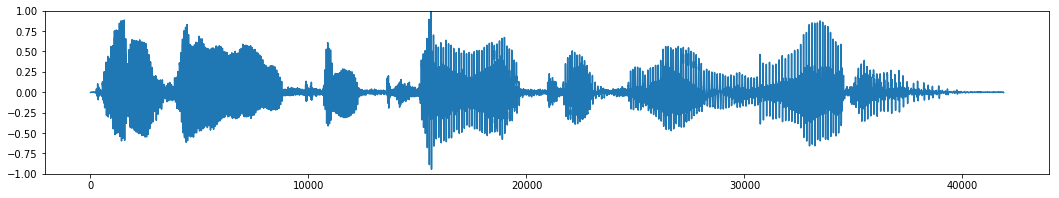

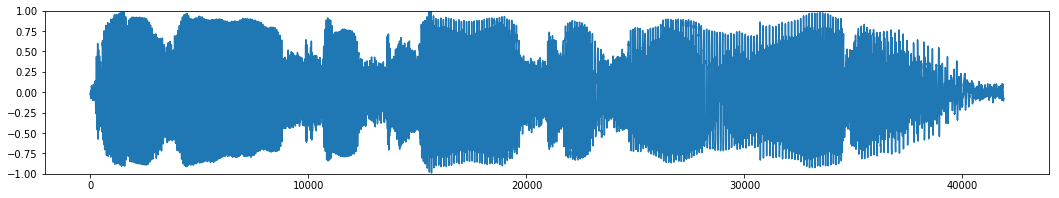

In [21]:
wav_mulaw = mu_law(normed_wav)

plt.figure(figsize=[18, 3])
plt.plot(normed_wav)
plt.ylim([-1, 1])
plt.show()

plt.figure(figsize=[18, 3])
plt.plot(wav_mulaw)
plt.ylim([-1, 1])
plt.show()

# wav 들어보기
import IPython.display as ipd
ipd.Audio(wav_mulaw, rate=sr)


## mu-law 8bit quantization

quantized values : [ -94  -88  -87  -88  -97  -97  -97  -87  -71  -90  -88   61   79   89
   86  -72   82  103  106  111  111  111  115  112   99   99  102  105
  111  105   94   81   30  -70  -60  -78  -91  -87  -89  -91  -98 -106
 -110 -105 -103 -103 -100  -99  -88  -70  -83  -85  -76  -65   72   85
   85   94   96   97   95   89   85   91   92   90   83   61  -20  -54
  -75  -85  -90  -92  -92  -93  -97 -102 -103 -105 -103 -101 -102 -103
 -101 -105 -101 -102  -93  -94   66   99   76  100  -78  -59  104  109
  119  121]


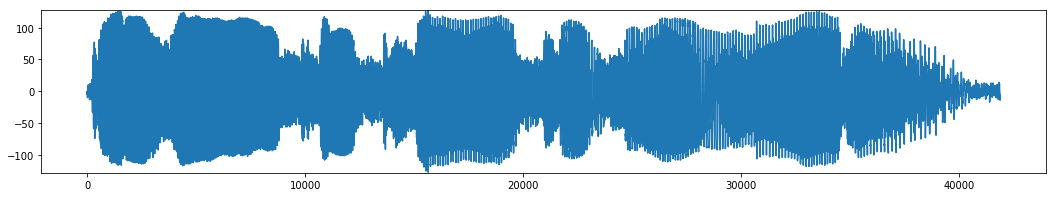

In [13]:
Bit = 8
max_value = 2 ** (Bit-1) # 128

# max_value를 곱함
quantized_8mu_wav = wav_mulaw * max_value
# integer로 반올림
quantized_8mu_wav = np.round(quantized_8mu_wav).astype(int)
# 범위 설정
quantized_8mu_wav = np.clip(quantized_8mu_wav, -max_value, max_value-1)

print('quantized values :', quantized_8mu_wav[1000:1100])

plt.figure(figsize=[18, 3])
plt.plot(quantized_8mu_wav)
plt.ylim([-max_value, max_value])
plt.show()


## mu-law encoded wav reconstruction 

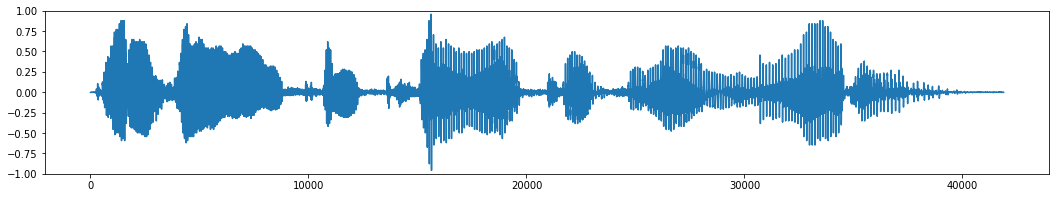

In [14]:
def inverse_mu_law(y, mu=255):
    # reference : https://en.wikipedia.org/wiki/Μ-law_algorithm
    return np.sign(y) * (1/mu) * ((1+mu) ** np.abs(y) - 1)

dequantized_wav = quantized_8mu_wav / max_value
reconstructed_wav = inverse_mu_law(dequantized_wav)

plt.figure(figsize=[18, 3])
plt.plot(reconstructed_wav)
plt.ylim([-1, 1])
plt.show()

# reconstructed_wav 들어보기, wav와 quantized_8_wav reconstructed_wav 비교해보기
import IPython.display as ipd
ipd.Audio(reconstructed_wav, rate=sr)


### 연습4: normed_wav를 A-law로 변환하고, 8-bit quantization해봅시다.

In [15]:
'''
A-law 변환
'''
def A_law(x, A=87.6):
    # reference : https://en.wikipedia.org/wiki/A-law_algorithm
    # hint : np.where()을 이용하면 element 값에 따라 조건을 나누어 식을 만들 수 있다.
    return x

wav_Alaw = A_law(normed_wav)

'''
8-bit Quantization
'''
quantized_8A_wav = None


### 연습5: 8-bit quantization한 것을 다시 dequantization하고, A-law의 역변환을 한 뒤 소리를 들어봅시다.

In [16]:
def inverse_A_law(y, A=87.6):
    # reference : https://en.wikipedia.org/wiki/A-law_algorithm
    return y

'''
Dequantization
'''
dequantized_wav = None

'''
A-law inverse transform
'''
reconstructed_wav = None
